In [151]:
import pandas as pd
from statistics import mean,median,stdev
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [16,10]  

# Pendulum Calibration

In [152]:
def linear_fit(v,m,c):
    return m*v +c

def getData(file):
    tab1 = pd.read_csv(file,
                    index_col=None,
                    header=None,
                    names=['Time','Pendulum_V'],
                    skiprows=9)
    if(tab1['Time'][0] != 0 and tab1['Time'][0]<0):                
        tab1['Time'] = tab1['Time'] + abs(tab1['Time'][0])
    elif(tab1['Time'][0] != 0 and tab1['Time'][0]>0):
        tab1['Time'] = tab1['Time'] - abs(tab1['Time'][0])

    return tab1

tab1 = getData('lab3Data2/calibration/lower_pendulum_callibration0.csv')
print(tab1)

degrees_l150 = [0,10,30,60,90,120]
degrees_gr150 = [150, 170,190,210,240,270,300,330,350]

deg_upper_l170 = [0,10,30,60,90,120,150]
deg_upper_gr170 = [170,190,210,240,270,300,330,350]

             Time  Pendulum_V
0        0.000000    0.012796
1        0.000312    0.038589
2        0.000625    0.038589
3        0.000938    0.038589
4        0.001250    0.038668
...           ...         ...
262139  81.918438    0.000000
262140  81.918750    0.000000
262141  81.919063    0.000000
262142  81.919375    0.000000
262143  81.919688    0.000000

[262144 rows x 2 columns]


## lower pendulum calibration

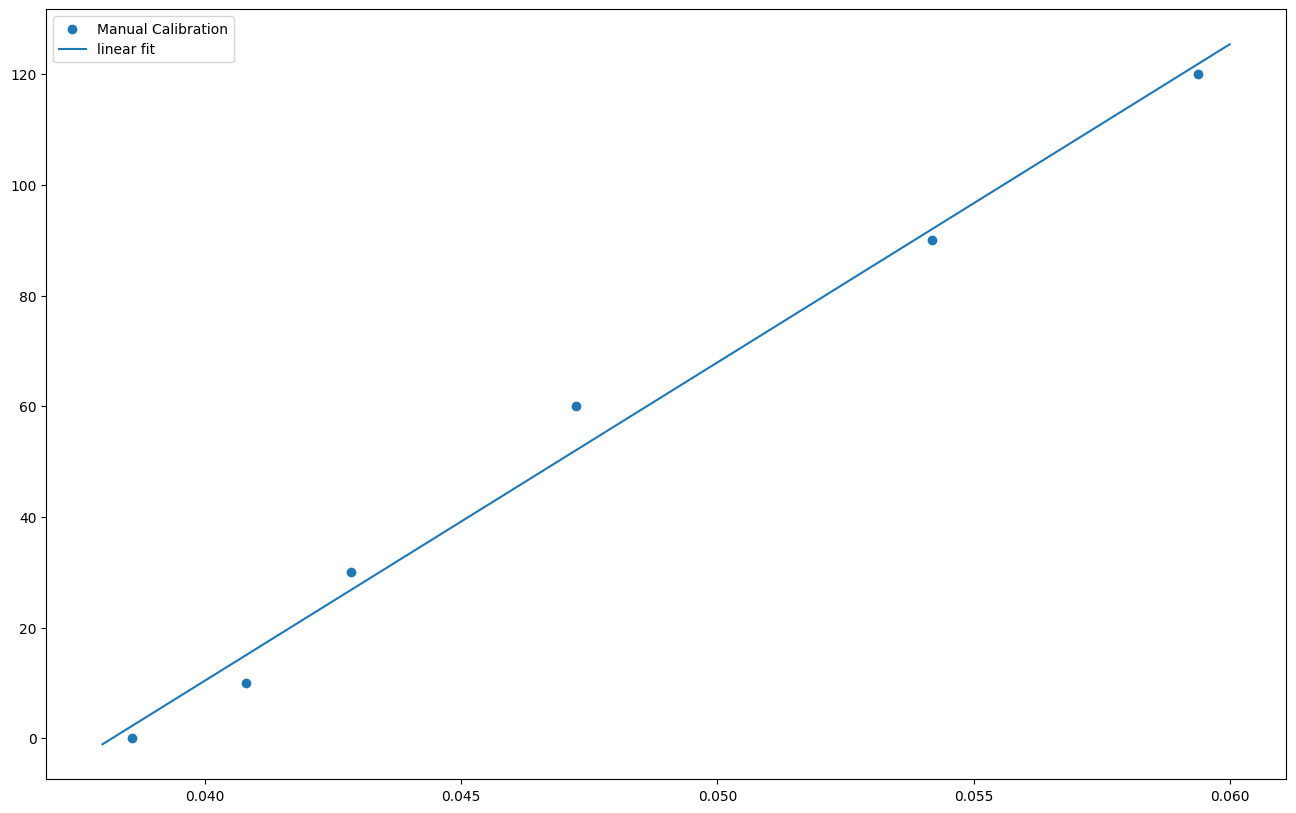

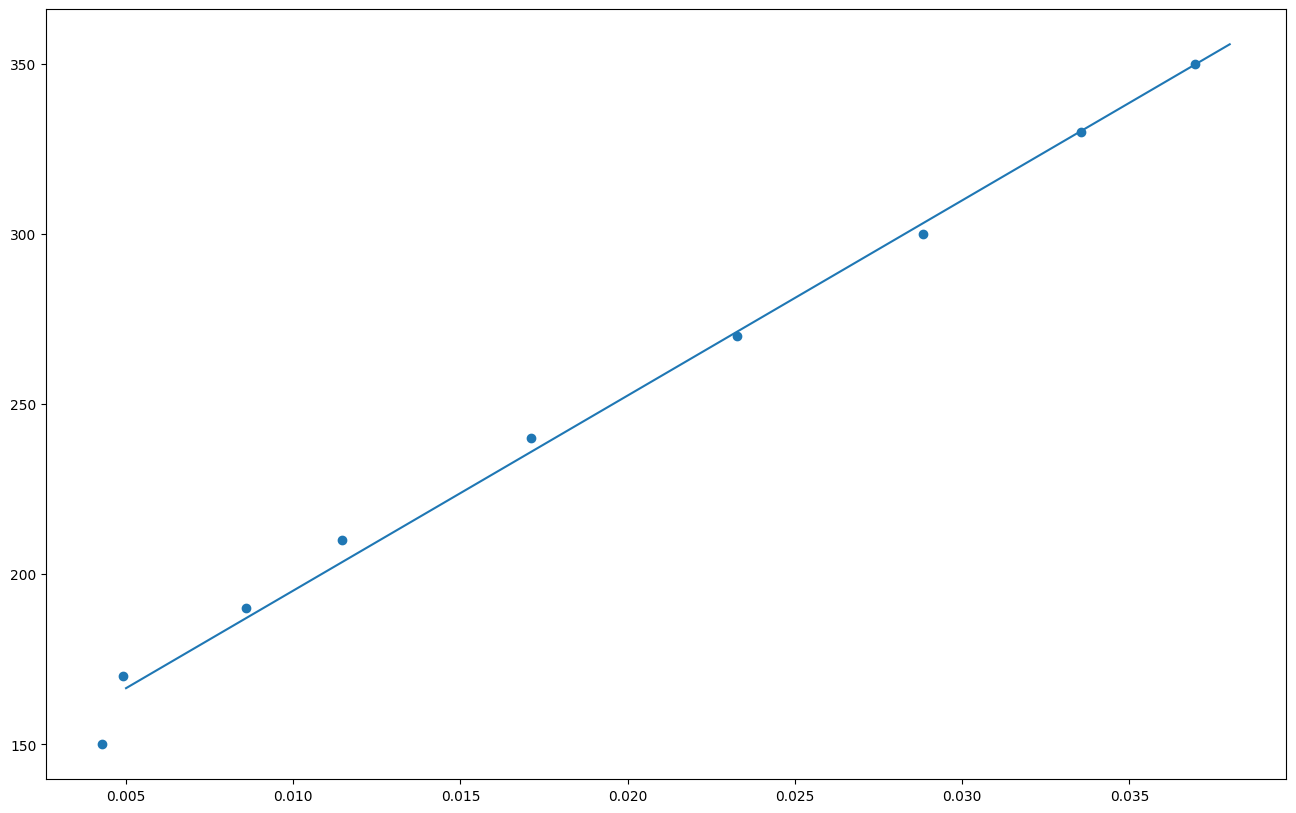

In [153]:
 #angles less than 150
arr_l_l150 = np.array([])
# data = getData("data/Deg0.csv")
for i in range(0,6,1):
    file_name = "lab3Data2/calibration/lower_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr_l_l150 = np.append(arr_l_l150,avg)
    
linearfit = curve_fit(linear_fit,arr_l_l150,degrees_l150)
m = linearfit[0][0]
n = linearfit[0][1]
coef_ll150 = [m,n]
voltage = np.linspace(0.038,0.06,100)
linearfit_vals_ll150 = linear_fit(voltage,m,n)
plt.scatter(arr_l_l150, degrees_l150, label = "Manual Calibration")
plt.plot(voltage, linearfit_vals_ll150, label = "linear fit")
plt.legend()
plt.show()

arr_l_g150 = np.array([])
#lower_pendulum greater than 150
for i in range(6,15,1):
    file_name = "lab3Data2/calibration/lower_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr_l_g150 = np.append(arr_l_g150,avg)
    
linearfit = curve_fit(linear_fit,arr_l_g150,degrees_gr150)
m = linearfit[0][0]
n = linearfit[0][1]
coef_lg150 = [m,n]
voltage = np.linspace(0.005,0.038,100)
linearfit_vals_lg150 = linear_fit(voltage,m,n)
plt.scatter(arr_l_g150, degrees_gr150, label = "Manual Calibration")
plt.plot(voltage, linearfit_vals_lg150, label = "linear fit")
plt.show()

## upper pendulum calibration

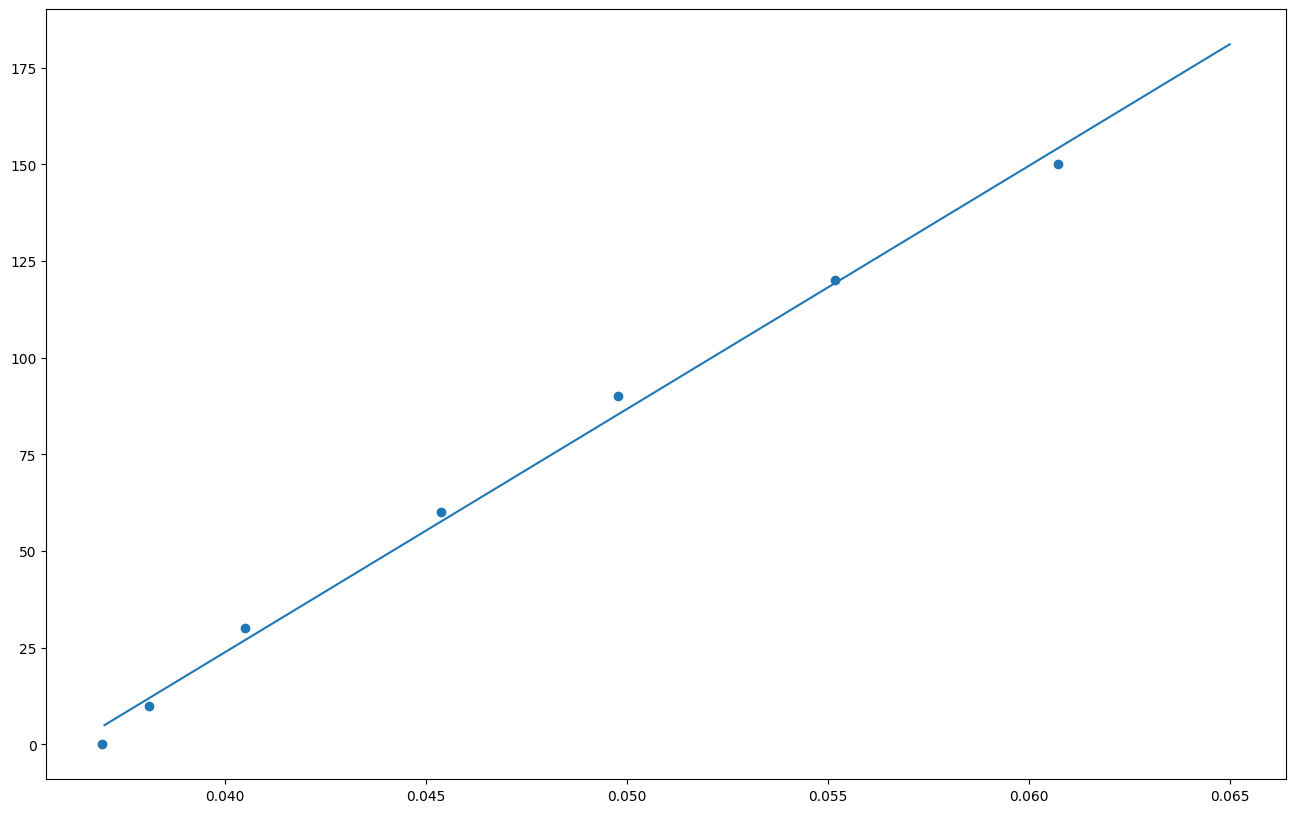

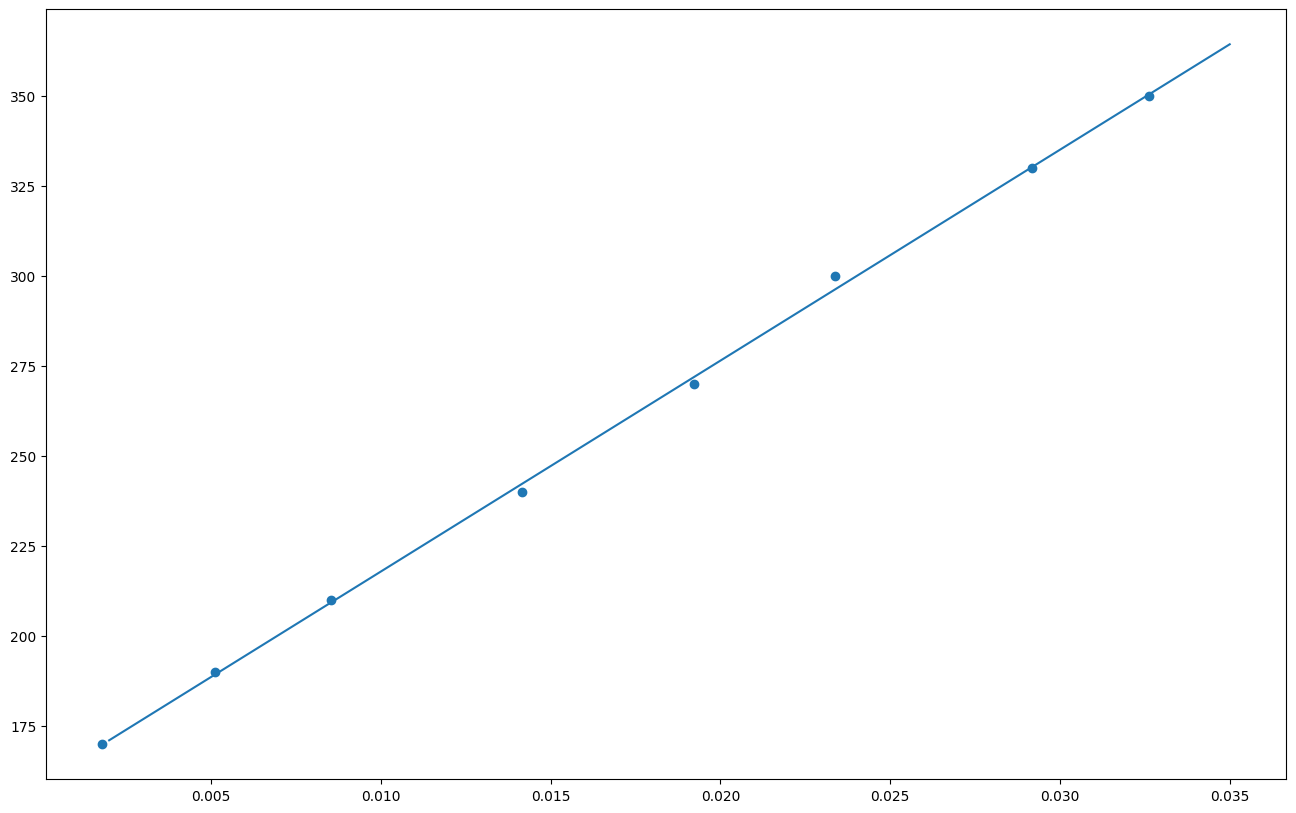

In [154]:
#upper pendulum calibration
#angles less than 170
arr_u_l170 = np.array([])
for i in range(1,8,1):
    file_name = "lab3Data2/calibration/upper_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr_u_l170 = np.append(arr_u_l170,avg)
    
linearfit = curve_fit(linear_fit,arr_u_l170,deg_upper_l170)
m = linearfit[0][0]
n = linearfit[0][1]
coef_ul170 = [m,n]
voltage = np.linspace(0.037,0.065,100)
linearfit_vals_ul170 = linear_fit(voltage,m,n)
plt.scatter(arr_u_l170, deg_upper_l170, label = "Manual Calibration")
plt.plot(voltage, linearfit_vals_ul170, label = "linear fit")
plt.show()


#angles greater than 170
arr_u_g170 = np.array([])
for i in range(8,16,1):
    file_name = "lab3Data2/calibration/upper_pendulum_callibration"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Pendulum_V"][:25000]
    avg = np.mean(v_data)
    arr_u_g170 = np.append(arr_u_g170,avg)
    
linearfit = curve_fit(linear_fit,arr_u_g170,deg_upper_gr170)
m = linearfit[0][0]
n = linearfit[0][1]
coef_ug170 = [m,n]
voltage = np.linspace(0.002,0.035,100)
linearfit_vals_ug170 = linear_fit(voltage,m,n)    
plt.scatter(arr_u_g170, deg_upper_gr170, label = "Manual Calibration")
plt.plot(voltage, linearfit_vals_ug170, label = "linear fit")

In [164]:
def getExperimentData(file):
    tab1 = pd.read_csv(file,
                    index_col=None,
                    header=None,
                    names=['Time','LowerPendulum_V','UpperPendulum_V'],
                    skiprows=11)
    if(tab1['Time'][0] != 0 and tab1['Time'][0]<0):                
        tab1['Time'] = tab1['Time'] + abs(tab1['Time'][0])
    elif(tab1['Time'][0] != 0 and tab1['Time'][0]>0):
        tab1['Time'] = tab1['Time'] - abs(tab1['Time'][0])

    return tab1


def lower_p_angles_data_elementwise(v_data, coef_lg150, coef_ll150,
                                    thresh=arr_l_l150[0]):
    """
    Piece-wise linear calibration for the *lower-P* sensor.
      • coef_lg150 is applied where v_data  <  thresh
      • coef_ll150 is applied where v_data  ≥  thresh
        (using ≥ here guarantees the value 0.038 is handled;
         change to > if you *want* 0.038 to be excluded from both ranges)
    """
    mask = v_data < thresh
    out  = np.empty_like(v_data, dtype=float)

    out[ mask] = linear_fit(v_data[ mask], *coef_lg150)
    out[~mask] = linear_fit(v_data[~mask], *coef_ll150)
    return out

def upper_p_angles_data_elementwise(v_data, coef_ug170, coef_lg170,
                                    thresh=arr_u_l170[0]):
    """
    Piece-wise linear calibration for the *upper-P* sensor.
      • coef_ug170 is applied where v_data ≤  thresh
      • coef_lg170 is applied where v_data  >  thresh
    """
    mask = v_data <= thresh                        # Boolean array
    out  = np.empty_like(v_data, dtype=float)      # pre-allocate result

    # m*x + b for each segment (linear_fit is assumed to exist)
    out[ mask] = linear_fit(v_data[ mask], *coef_ug170)
    out[~mask] = linear_fit(v_data[~mask], *coef_lg170)
    return out

# Repeatability

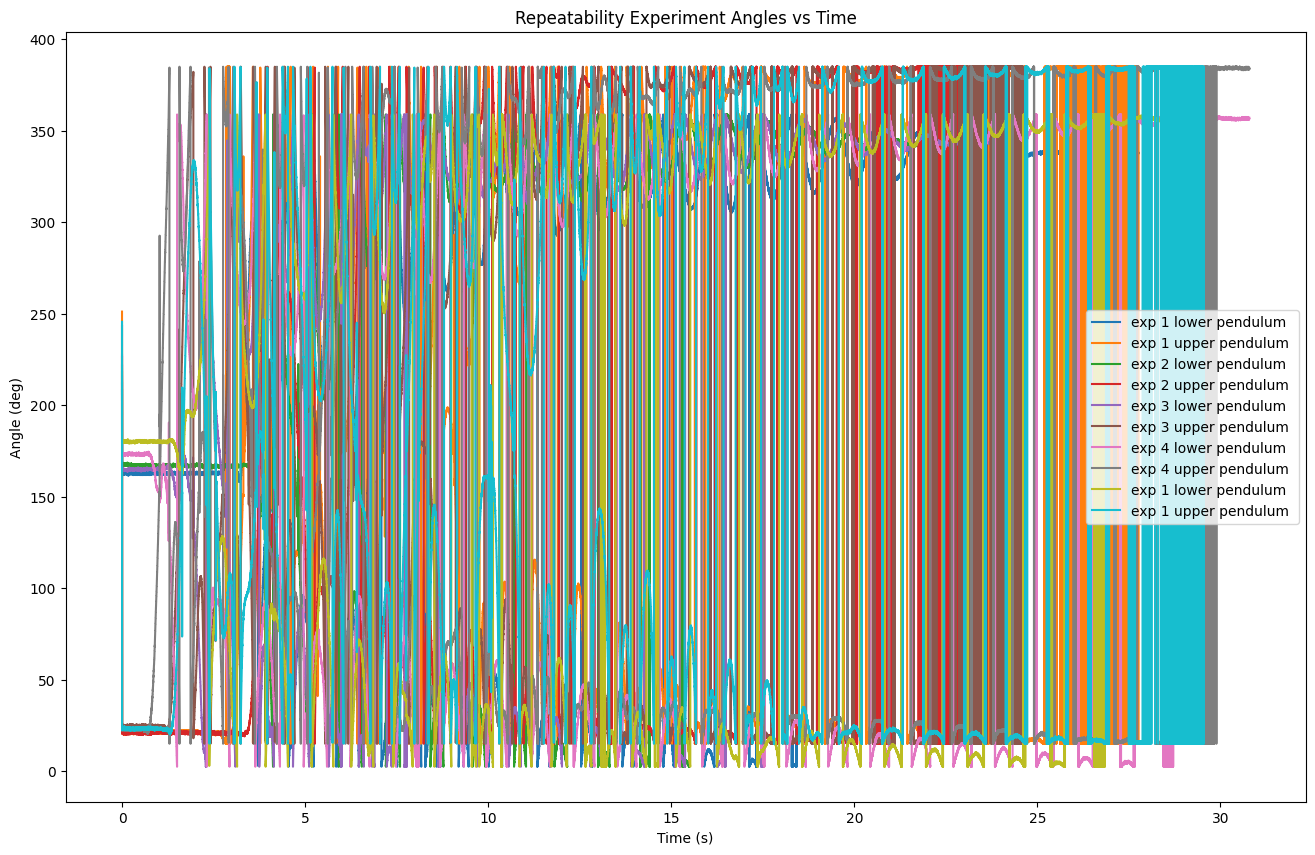

In [165]:
def getAngles(file):
    repeatability = getExperimentData(file)
    t_data = np.array(repeatability["Time"][:])
    v_data_l = np.array(repeatability["LowerPendulum_V"][:])
    angles_data_l = lower_p_angles_data_elementwise(v_data_l, coef_lg150,coef_ll150)
    v_data_u = np.array(repeatability["UpperPendulum_V"][:])
    angles_data_u = lower_p_angles_data_elementwise(v_data_u, coef_ug170,coef_ul170)

    return t_data,angles_data_l, angles_data_u

repeatability1 = getAngles('lab3Data2/repeatability/repeatability1.csv')
repeatability2 = getAngles('lab3Data2/repeatability/repeatability2.csv')
repeatability3 = getAngles('lab3Data2/repeatability/repeatability3.csv')
repeatability4 = getAngles('lab3Data2/repeatability/repeatability4.csv')
repeatability5 = getAngles('lab3Data2/repeatability/repeatability5.csv')

plt.plot(repeatability1[0], repeatability1[1], label = 'exp 1 lower pendulum')
plt.plot(repeatability1[0],repeatability1[2], label = 'exp 1 upper pendulum ')

plt.plot(repeatability2[0], repeatability2[1], label = 'exp 2 lower pendulum')
plt.plot(repeatability2[0],repeatability2[2], label = 'exp 2 upper pendulum ')

plt.plot(repeatability3[0], repeatability3[1], label = 'exp 3 lower pendulum')
plt.plot(repeatability3[0],repeatability3[2], label = 'exp 3 upper pendulum ')

plt.plot(repeatability4[0], repeatability4[1], label = 'exp 4 lower pendulum')
plt.plot(repeatability4[0],repeatability4[2], label = 'exp 4 upper pendulum ')

plt.plot(repeatability5[0], repeatability5[1], label = 'exp 1 lower pendulum')
plt.plot(repeatability5[0],repeatability5[2], label = 'exp 1 upper pendulum ')

plt.legend()
plt.title('Repeatability Experiment Angles vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

plt.show()

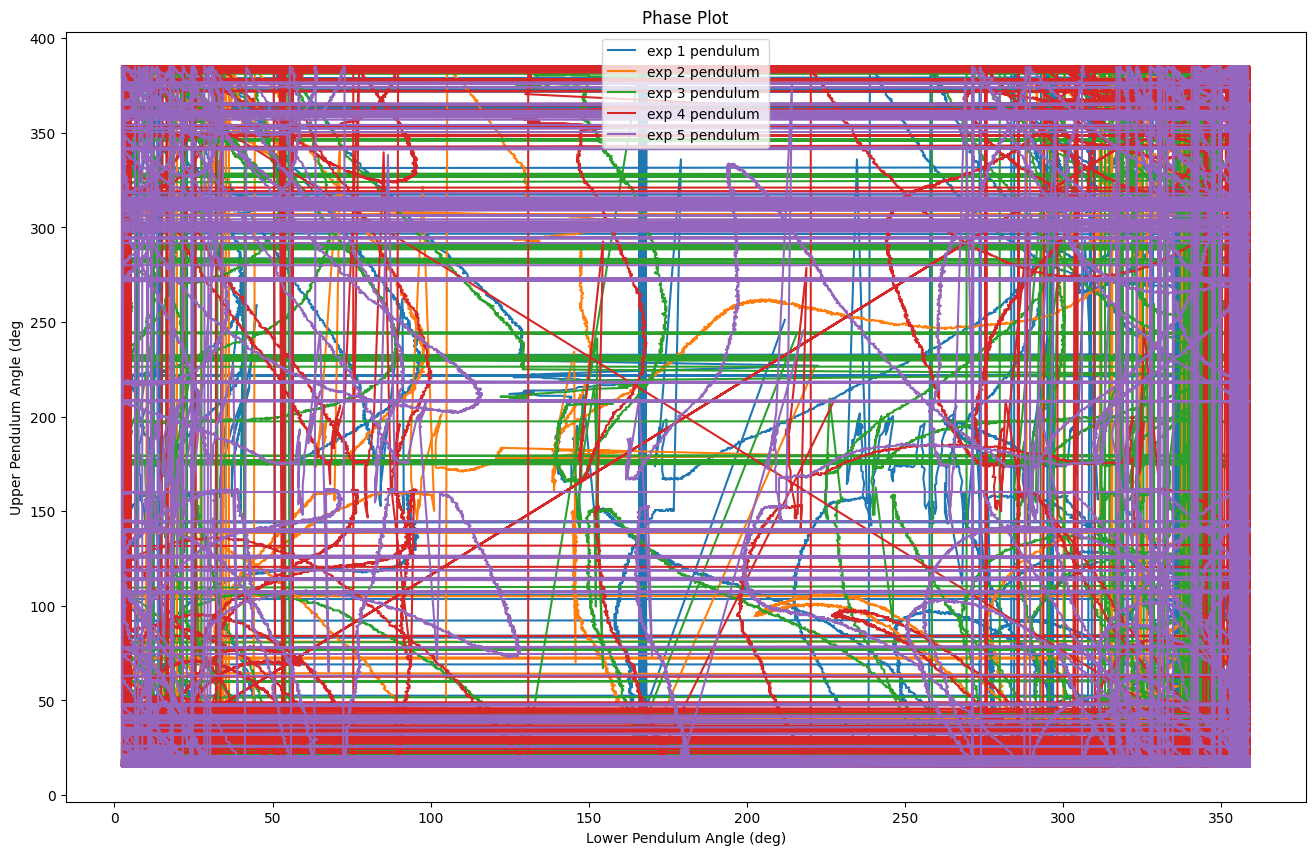

In [166]:
plt.plot(repeatability1[1], repeatability1[2], label = 'exp 1 pendulum')
plt.plot(repeatability2[1], repeatability2[2], label = 'exp 2 pendulum ')
plt.plot(repeatability3[1], repeatability3[2], label = 'exp 3 pendulum')
plt.plot(repeatability4[1], repeatability4[2], label = 'exp 4 pendulum ')
plt.plot(repeatability5[1], repeatability5[2], label = 'exp 5 pendulum')
plt.title('Phase Plot')
plt.xlabel('Lower Pendulum Angle (deg)')
plt.ylabel('Upper Pendulum Angle (deg')
plt.legend()
plt.show()

# Predictabilty


In [181]:
predictability1_1 = getAngles('lab3Data2/predictability/predictability1_1.csv')

def count_rotations(angle_series, units="deg"):
    """
    Count full clockwise (CW) and counter-clockwise (CCW) turns in a 1-D
    angle trace, treating every ±360° (or ±2π) encountered — even in a
    single jump — as one complete rotation.

    Parameters
    ----------
    angle_series : array-like (N,)
        Successive angular samples.
    units : {"deg", "rad"}, default "deg"
        Units of the input data.

    Returns
    -------
    cw  : int   # number of full clockwise  rotations
    ccw : int   # number of full counter-clockwise rotations
    """
    # ---- 1. convert to radians and unwrap so direction is preserved --------
    θ = np.asarray(angle_series, dtype=float)
    if units == "deg":
        θ = np.deg2rad(θ)

    θ = np.unwrap(θ)               # continuous evolution
    dθ = np.diff(θ)                # signed step-by-step changes

    # ---- 2. count how many whole 2π chunks sit inside each step ------------
    cw  = np.sum(np.maximum(0, np.floor(-dθ / (2*np.pi))).astype(int))
    ccw = np.sum(np.maximum(0, np.floor( dθ / (2*np.pi))).astype(int))

    return cw, ccw

rotations = count_rotations(predictability1_1[2], 'deg')
print(rotations)

(np.int64(0), np.int64(0))


# Obtaining angular velocity data

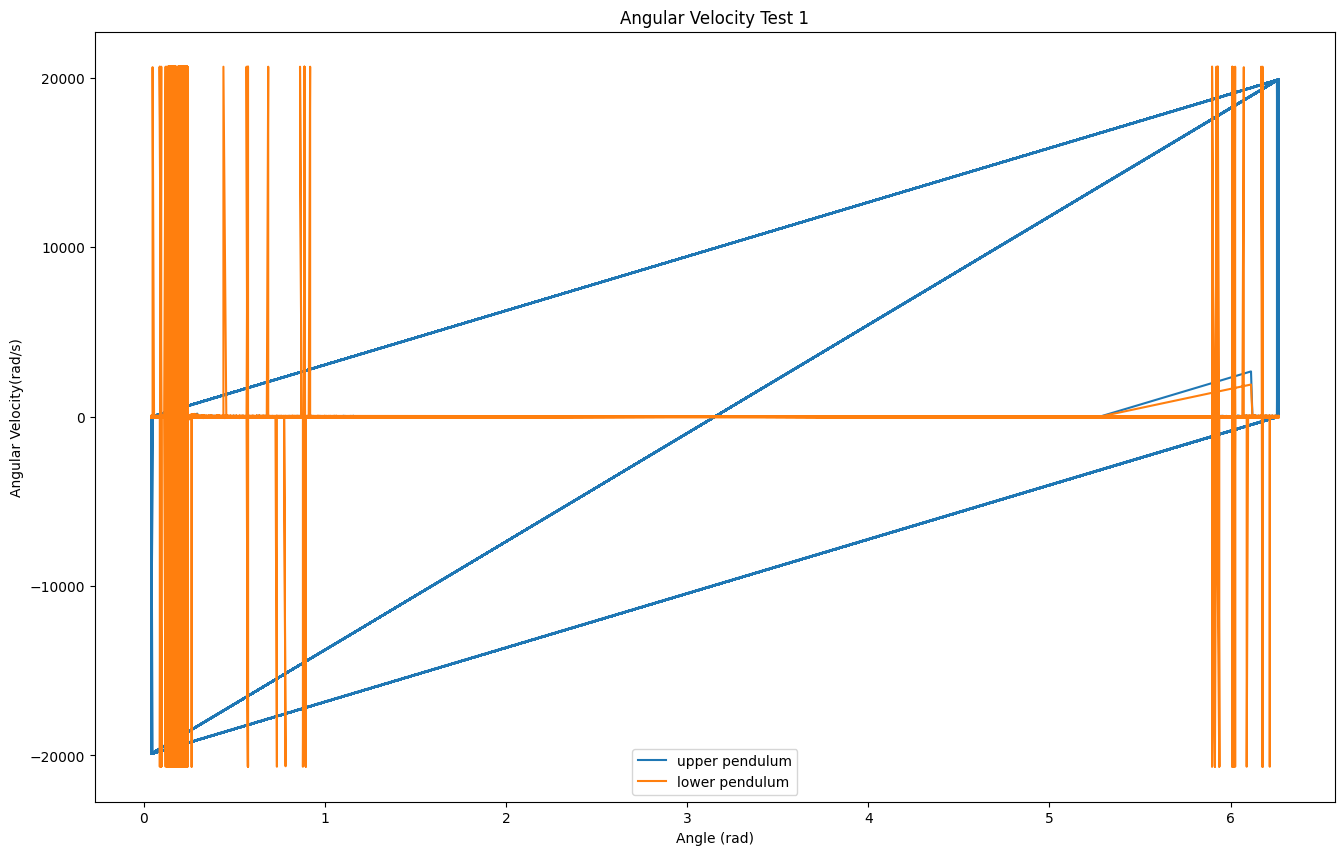

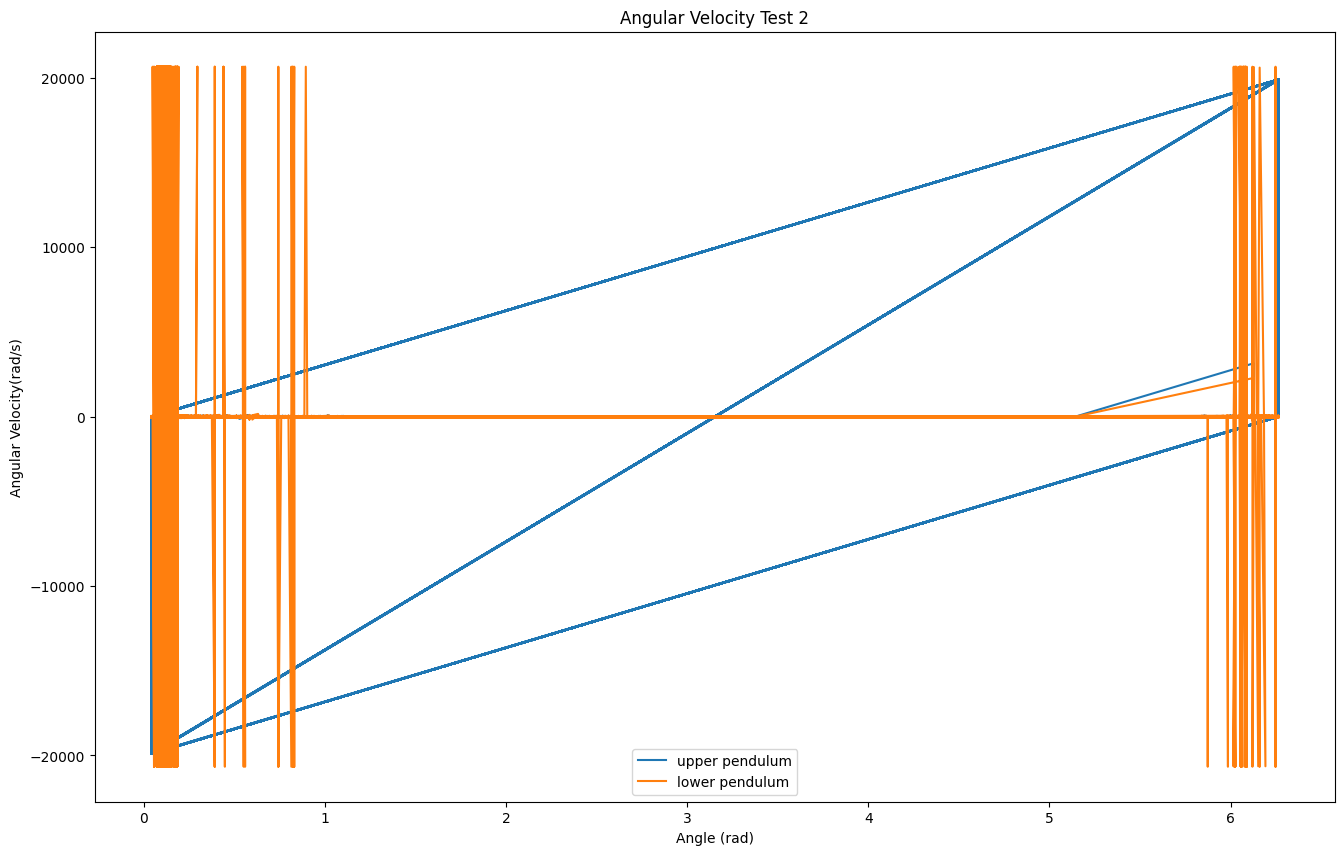

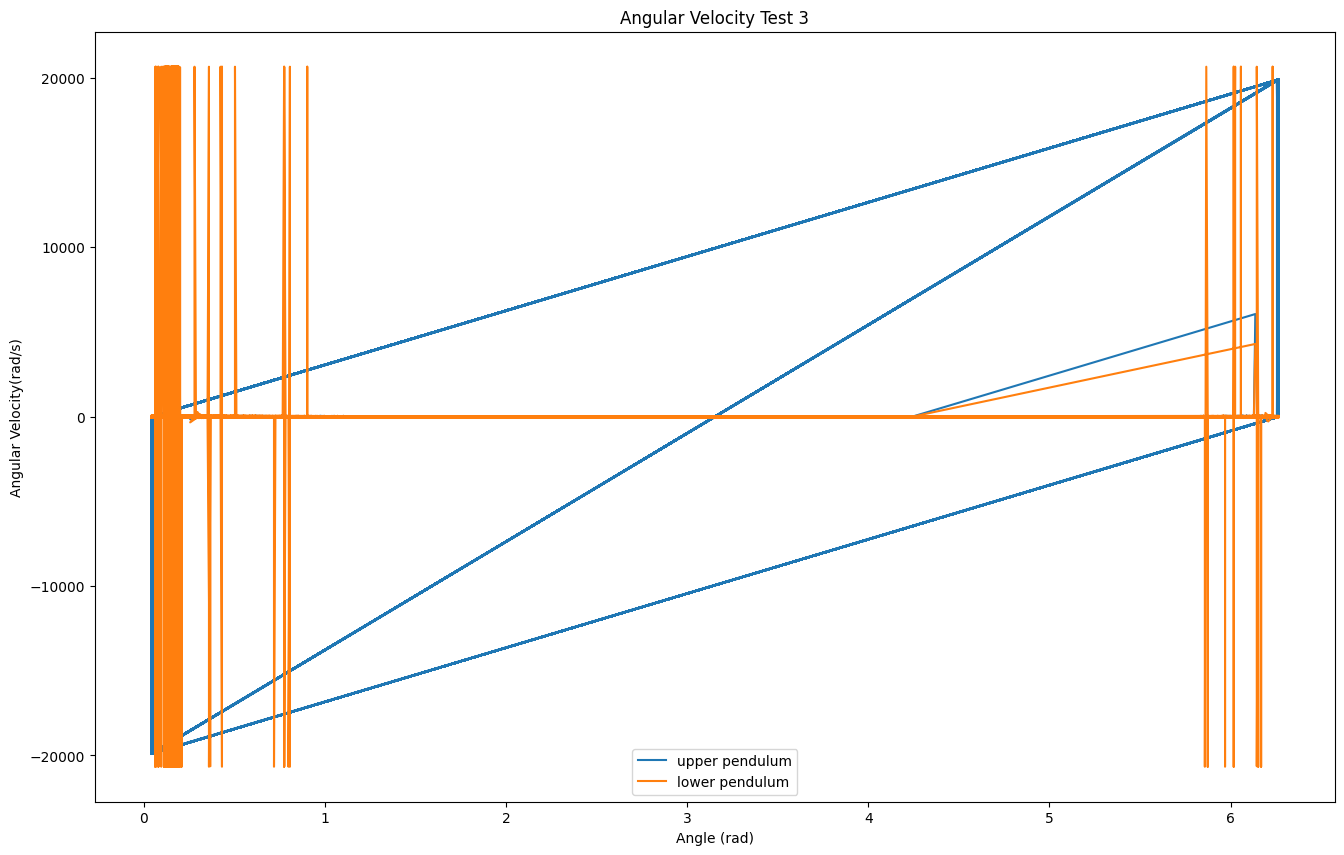

In [197]:
ang_velocity_1 = getAngles('lab3Data2/angular-velocity/angvel 01.csv')
angular_velocity_1_u =np.diff(ang_velocity_1[1]*np.pi/180)/np.diff(ang_velocity_1[0])
angular_velocity_1_l =np.diff( ang_velocity_1[2]*np.pi/180)/np.diff(ang_velocity_1[0])
angular_velocity_1_u = np.insert(angular_velocity_1_u, 0,0)
angular_velocity_1_l = np.insert(angular_velocity_1_l, 0,0)
plt.plot(ang_velocity_1[1]*np.pi/180, angular_velocity_1_u, label='upper pendulum')
plt.plot(ang_velocity_1[1]*np.pi/180, angular_velocity_1_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 1')
plt.legend()
plt.show()

ang_velocity_2 = getAngles('lab3Data2/angular-velocity/angvel 02.csv')
angular_velocity_2_u =np.diff(ang_velocity_2[1]*np.pi/180)/np.diff(ang_velocity_2[0])
angular_velocity_2_l =np.diff( ang_velocity_2[2]*np.pi/180)/np.diff(ang_velocity_2[0])
angular_velocity_2_u = np.insert(angular_velocity_2_u, 0,0)
angular_velocity_2_l = np.insert(angular_velocity_2_l, 0,0)
plt.plot(ang_velocity_2[1]*np.pi/180, angular_velocity_2_u, label='upper pendulum')
plt.plot(ang_velocity_2[1]*np.pi/180, angular_velocity_2_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 2')
plt.legend()
plt.show()

ang_velocity_3 = getAngles('lab3Data2/angular-velocity/angvel 03.csv')
angular_velocity_3_u =np.diff(ang_velocity_3[1]*np.pi/180)/np.diff(ang_velocity_3[0])
angular_velocity_3_l =np.diff( ang_velocity_3[2]*np.pi/180)/np.diff(ang_velocity_3[0])
angular_velocity_3_u = np.insert(angular_velocity_3_u, 0,0)
angular_velocity_3_l = np.insert(angular_velocity_3_l, 0,0)
plt.plot(ang_velocity_3[1]*np.pi/180, angular_velocity_3_u, label='upper pendulum')
plt.plot(ang_velocity_3[1]*np.pi/180, angular_velocity_3_l, label='lower pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity(rad/s)')
plt.title('Angular Velocity Test 3')
plt.legend()
plt.show()

# Numerical SImulation